<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [345]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 1. Import the data

In [350]:
data = pd.read_csv(r'/Users/annaxu/Documents/Data Science/DATA/ais.csv', index_col = 0)
data.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


### 2. Do some EDA of relationships between features.

In [353]:
#Check shape, nulls, and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 22.1+ KB


In [355]:
#No null values and majority are numeric columns

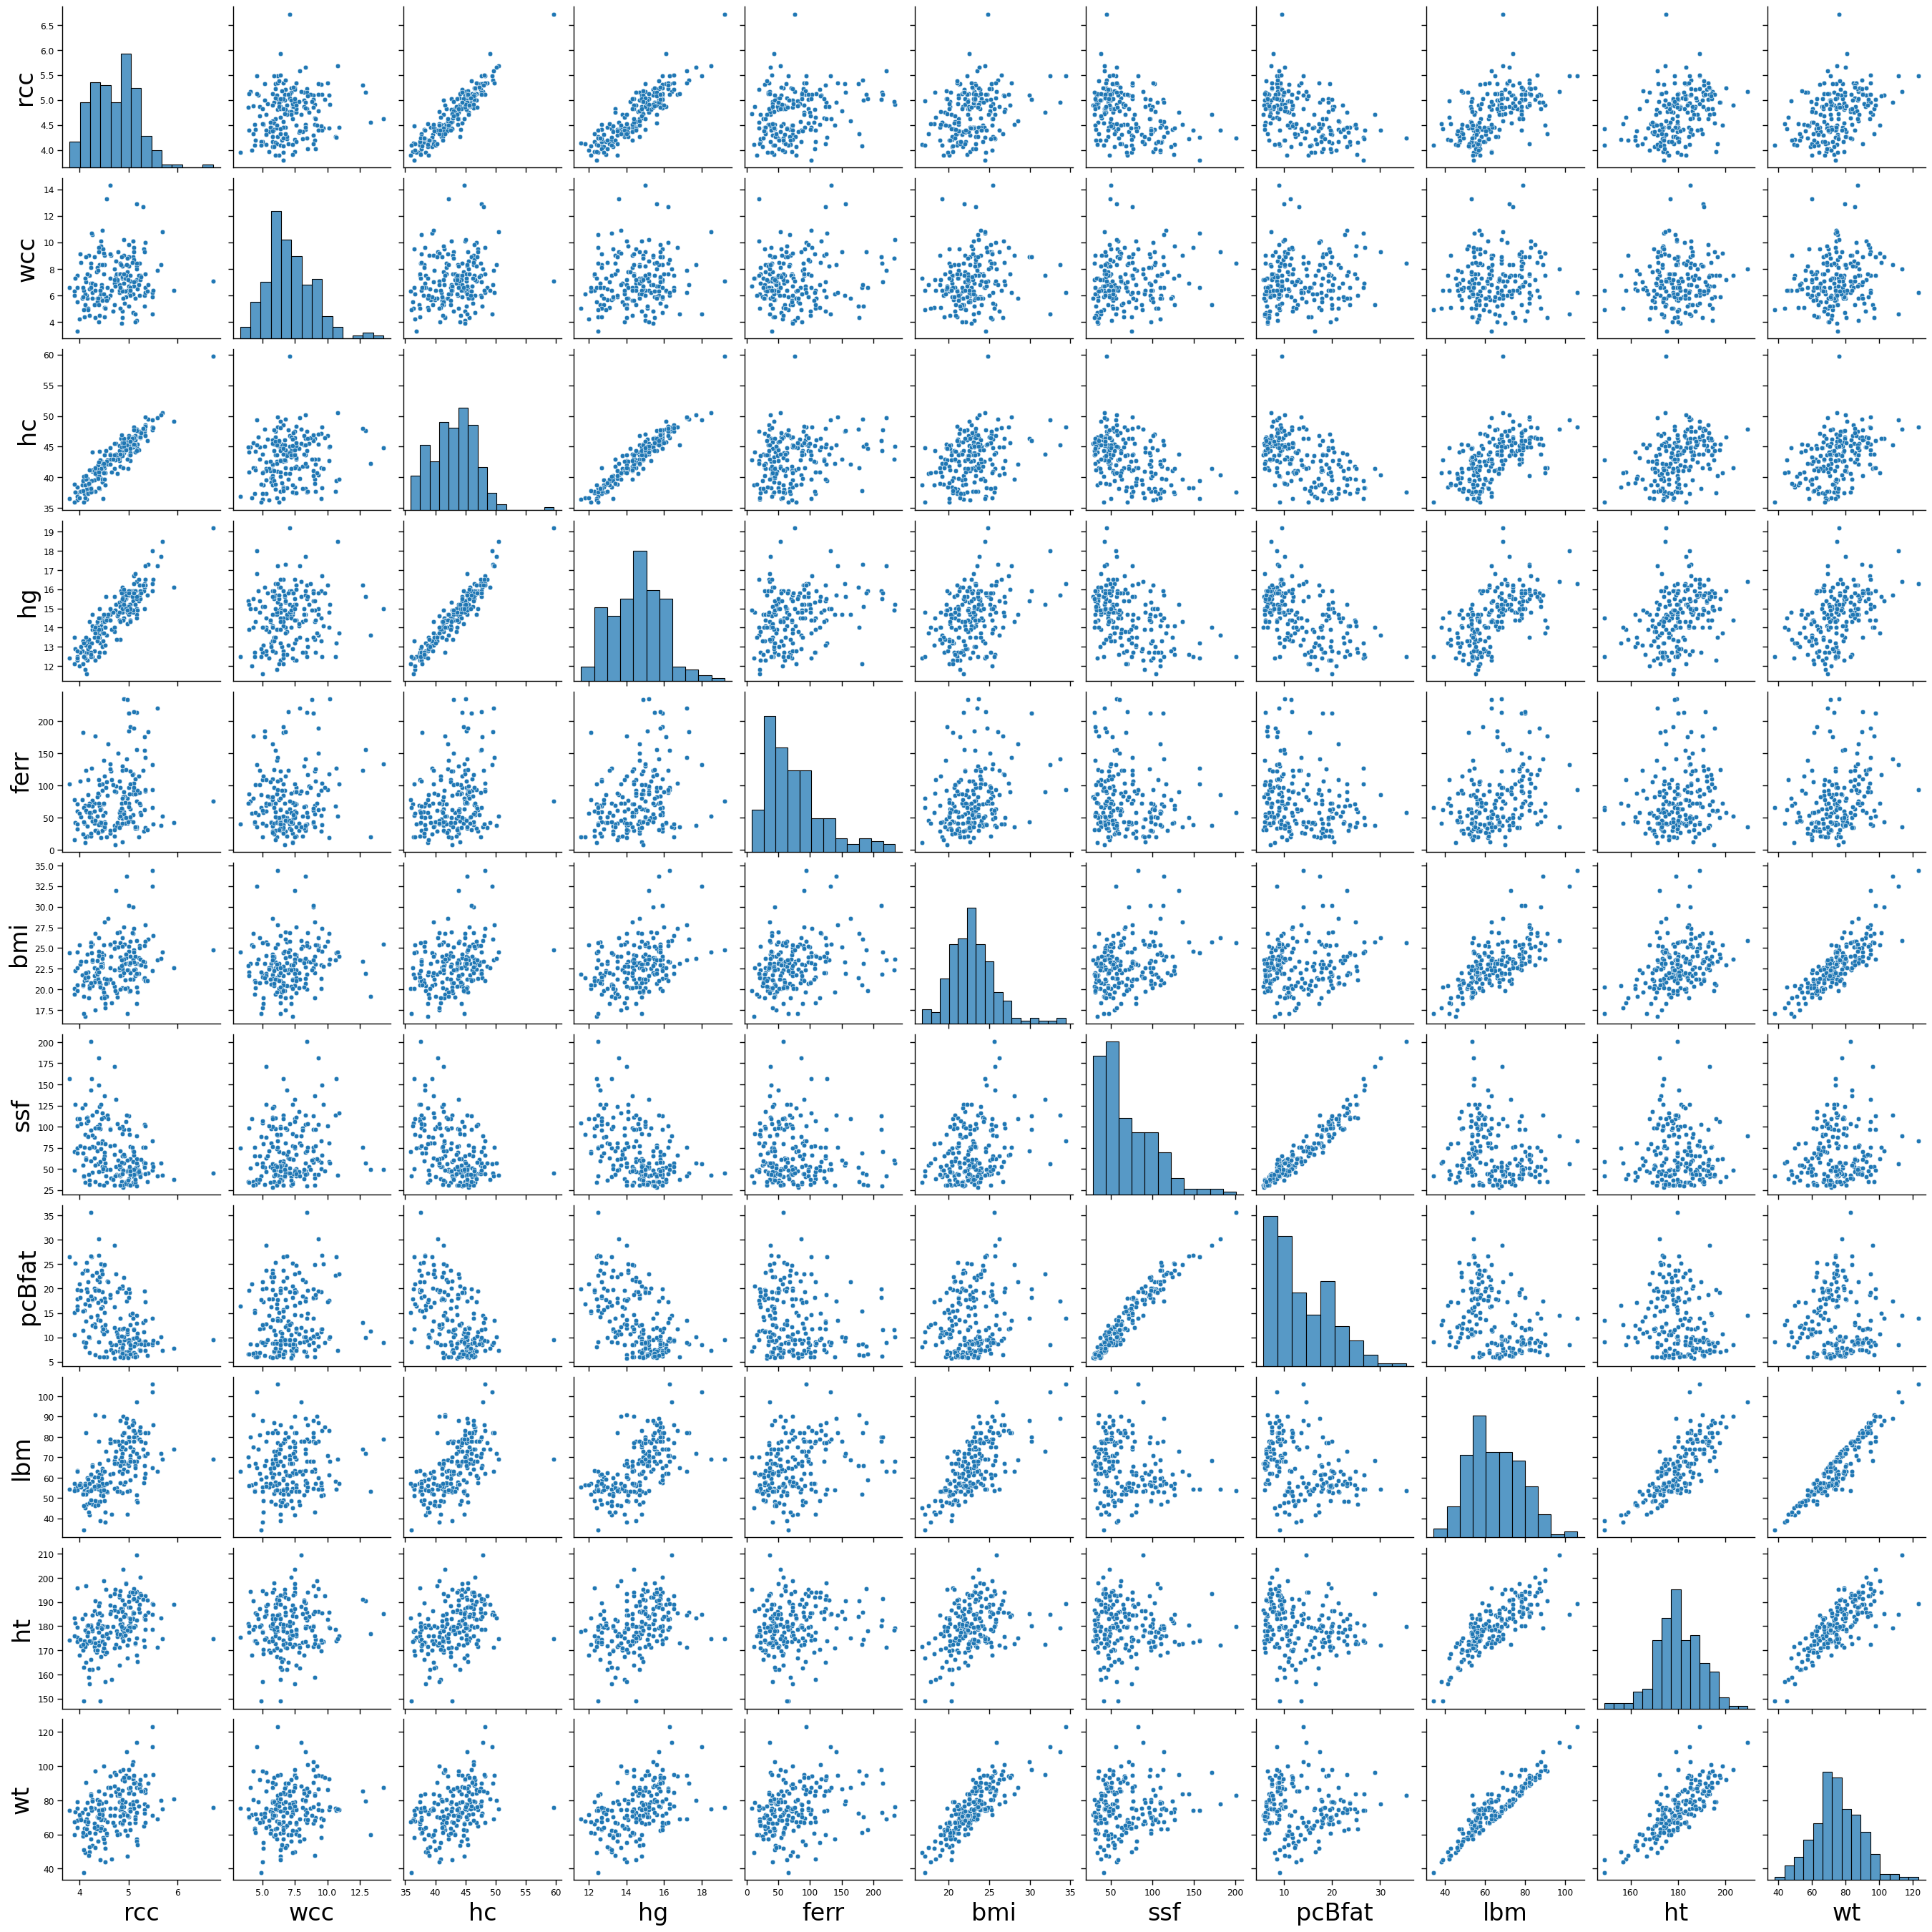

In [357]:
#visualise features in pairs
sns.set_context("paper", rc={"axes.labelsize":24}) #small scale plots but big axes labels
sns.pairplot(data)
plt.show()

In [358]:
#Not dropping columns with high correlation because our goal is to cluster athletes into gender without using the sex column, so we do want columns potentially correlated with sex and correlated with each other.

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [360]:
#Drop sex and sport columns
data2 = data.drop(['sex', 'sport'], axis=1)
data2.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt'],
      dtype='object')

In [361]:
#Standardise the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [363]:
#Build a model to group data in 2 clusters
model = KMeans(n_clusters=2)
model.fit(scaled_data)

KMeans(n_clusters=2)

### 5. Get the labels for the models using the labels_ attribute.

In [365]:
#Get cluster assignment for each datapoint
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [367]:
inertias = []
for cluster in range (1,13): #iterate over 1 to 12 clusters
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_) #calculate inertia of the cluster and append to inertias list

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

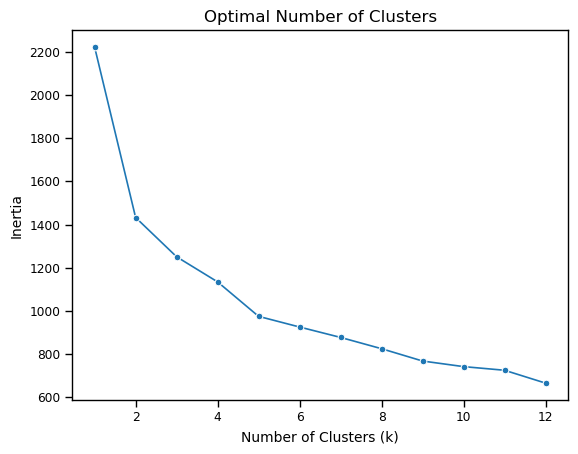

In [369]:
inert_df = pd.DataFrame({'k': range(1,13), 'Inertia': INERTIAS})
sns.lineplot(data = inert_df, x = 'k', y = 'Inertia', marker = 'o')
plt.title('Optimal Number of Clusters', fontsize = 12)
plt.xlabel('Number of Clusters (k)', fontsize = 10)
plt.ylabel('Inertia', fontsize = 10)
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

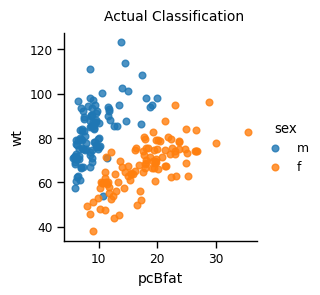

In [371]:
#Plot weight vs percent body fat with actual split between male and female
actual = sns.lmplot(
    x='pcBfat', y='wt',
    data=data,
    hue='sex',
    hue_order=['m', 'f'],
    fit_reg=False,
    height=3,       
    aspect=1       
)
actual.set_axis_labels("pcBfat", "wt", fontsize = 10) 
actual.fig.suptitle("Actual Classification", fontsize = 10, y = 1.03, x = 0.6)  
plt.show()

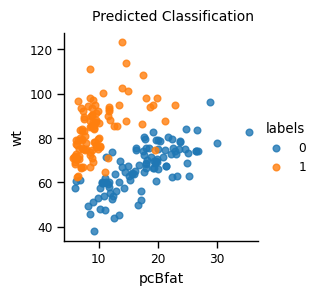

In [372]:
#Plot weight vs percent body fat with predicted split between male and female

#Add KMeans labels (cluster assignment of each data point) to the dataframe
data['labels'] = model.labels_

actual = sns.lmplot(
    x='pcBfat', y='wt',
    data=data,
    hue='labels',
    fit_reg=False,
    height=3,       
    aspect=1       
)
actual.set_axis_labels("pcBfat", "wt", fontsize = 10) 
actual.fig.suptitle("Predicted Classification", fontsize = 10, y = 1.03, x = 0.6)  
plt.show()


In [ ]:
#The predicted clusters resemble the actual sex clusters. Therefore, weight and percent body fat are good indicators of gender. 



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



